# Baltimore Data Fellow Task

## Main Questions


In [1]:
import pandas as pd

df = pd.read_excel(
    "311_CSR_SW.xlsx",
    dtype_backend="pyarrow",
    dtype={
        "Service Request Number": "string",
        "SR Type": "string",
        "SR Status": "string",
        "Agency": "string",
        "Created Date": "datetime64[ns]",
        "Due Date": "datetime64[ns]",
        "Close Date": "datetime64[ns]",
        "Street Address": "string",
        "Neighborhood": "string",
        "Latitude": "float",
        "Longitude": "float",
        "geo_sw_quad": "string",
    },
    date_format="%Y-%m-%d %H:%M:%S",
)

Filtering as directed in the instructions


In [73]:
df = df.loc[
    ~df.loc[:, "SR Type"].str.contains("Proactive")
]  # removing "proactive" rows
df = df.loc[
    ~df.loc[:, "SR Status"].str.contains("Duplicate")
    & ~df.loc[:, "SR Status"].str.contains("Transferred")
]  # removing duplicate and trasnferred
df = df.loc[
    (df.loc[:, "Created Date"].dt.year >= 2017)
    & (df.loc[:, "Created Date"].dt.year <= 2019)
]

### For each type of service request, how many service requests were created each year from 2017-2019?


In [74]:
df_type_year = (
    df.groupby(["SR Type", df.loc[:, "Created Date"].dt.year])
    .size()
    .reset_index()
    .copy()
)
df_type_year.columns = ["SR Type", "Created Date", "n"]

In [75]:
df_type_year = df_type_year.pivot(columns="SR Type", index="Created Date")
df_type_year.columns = df_type_year.columns.droplevel(0)
df_type_year

SR Type,SW-Boarding,SW-Cleaning,SW-Dirty Alley,SW-Dirty Street,SW-HGW
Created Date,,,,,
2017,7445,10715,24065,15212,23488
2018,9025,16047,25936,15700,20327
2019,8007,10395,22117,13409,19157


<Axes: title={'center': 'Number of requests created by type per year (2017-2019)'}, xlabel='Created Date', ylabel='Number of requests'>

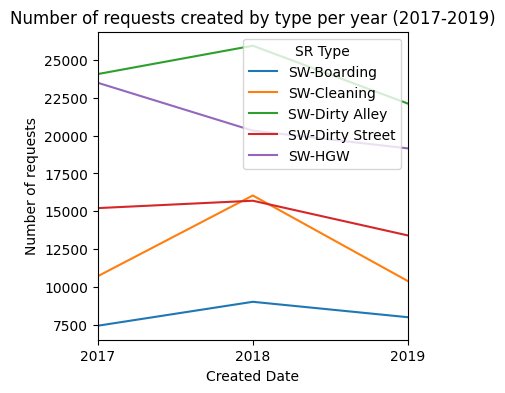

In [76]:
df_type_year.index = pd.to_datetime(df_type_year.index, format="%Y")
df_type_year.plot(
    kind="line",
    title="Number of requests created by type per year (2017-2019)",
    ylabel="Number of requests",
    figsize=(4, 4),
)

### How did the on-time % change over time? Please use a rolling 90 day average.


<Axes: title={'center': 'On time ratio using 90D rolling average (centered on date shown)'}, xlabel='Created Date', ylabel='On time ratio'>

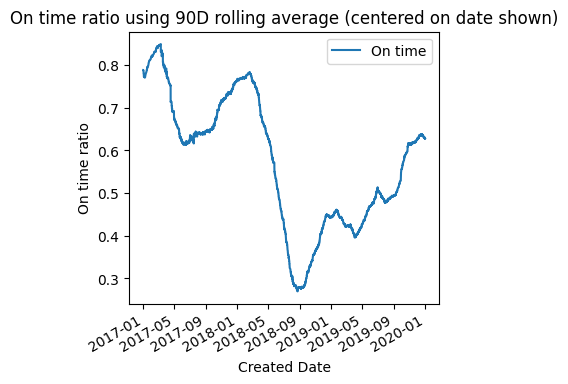

In [77]:
df.loc[:, "On time"] = df.loc[:, "Close Date"] < df.loc[:, "Due Date"]
df.set_index("Created Date").sort_index().rolling(window="90D", center=True).agg(
    {"On time": "mean"}
).plot(
    title="On time ratio using 90D rolling average (centered on date shown)",
    ylabel="On time ratio",
    figsize=(4, 4),
)

### What % of service requests created in 2019 were completed past the due date?


In [78]:
(~df.loc[df.loc[:, "Created Date"].dt.year == 2019, "On time"]).mean()

0.5107888075528494

### Using the information calculated above and other information from the dataset, can you provide evidence to determine if service requests created in 2019 are being completed equitably across the city?
